<a href="https://colab.research.google.com/github/vahedshaik/257clustering_kmeans/blob/main/vahed_Machine_Learning_Cluster_SalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Objective:

Sales prediction Using big mart Data:

The dataset is of Big mart, a retail outlet. This dataset constitutes various details about the items sold, the outlets locations, total sales value of the outlet for a given item. This data can be used for predict the future sales of these outlets. This prediction finally can help management takecareful decisions on selling more of the items in high demand and also helps make decisions on outlets, items which are not performing well. This prediction can also determine if the oulet performs as per expectations. 

The clusters below, and plots drawn help make some decisions and devise some strategies like:

1.The clusters are arranged according to the volume of their sales. This aids in our comprehension so that we may develop marketing plans properly.

2.The stores, locations, and item types in the cluster 0 contribute the least to overall sales value. As a result, we may develop a strategy to boost sales in these areas and item types.

3.Because cluster 1's stores, locations, and item types generate the highest revenue, we can add more of those types, locations, and item types.

4.Sales of low visibility items outpace those of high visibility items. This understanding can be used to guide decisions. 

In addition to clutsers, projections of sales performance for future years and outlets allow businesses to plan accordingly.

This colab notebook cosists of:

1.Install and import statements

2.Load data

3.Exploratory data analysis

4.Data Cleaning, preprocessing 

5.Data imputation

6.Encoding of categorical values

7.Feature Engineering - featureWiz

8.Elbow method used to determine the number of clusters

9.Clustering methods used: 

  *K-Modes(since datset contains categorical features) 
    
  *K - means
    
  *Agglomerative clustering




***Installing featurewiz***

In [235]:
!pip install featurewiz
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***Import statements***

In [236]:
from featurewiz import featurewiz
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from kmodes.kprototypes import KPrototypes

In [237]:
df = pd.read_csv('https://raw.githubusercontent.com/vahedshaik/mldatasets/main/bigsales.csv')

Viewing first 7 records

In [238]:
df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


In [239]:
categorical_features_idx = [0, 2, 4, 6, 7, 8, 9, 10]

In [240]:
numeric_features_idx = [1, 3, 5, 11]

In [241]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [242]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Get the number of records and fields in the dataset

In [243]:
df.shape

(8523, 12)

Viewing the columns in dataset

In [244]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Datatypes in the dataset

In [245]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Viewing all category values that various columns have, and also the number of occurances

In [246]:
print("Total categories in the feature Item_Type:\n", df["Item_Type"].value_counts(), "\n")
print("Total categories in the feature Outlet_Type:\n", df["Outlet_Type"].value_counts(), "\n")
print("Total categories in the feature Outlet_Size:\n", df["Outlet_Size"].value_counts(), "\n")
print("Total categories in the feature Outlet_Location_Type:\n", df["Outlet_Location_Type"].value_counts(), "\n")
print("Total categories in the feature Item_Fat_Content:\n", df["Item_Fat_Content"].value_counts())

Total categories in the feature Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Total categories in the feature Outlet_Type:
 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 

Total categories in the feature Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Total categories in the feature Outlet_Location_Type:
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

Plotting some features to visualize

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

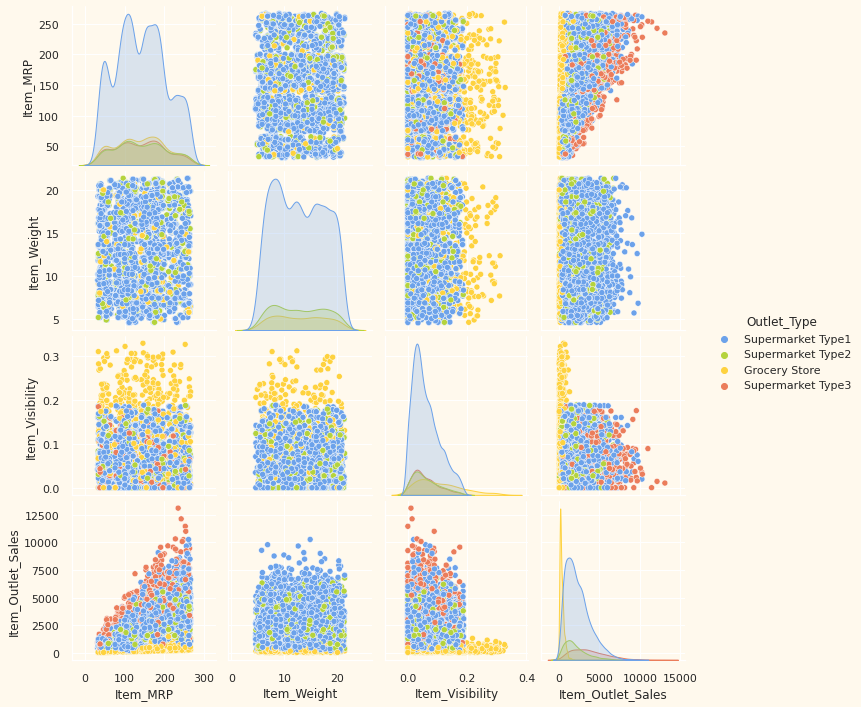

In [247]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#bcaecc", "#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]
To_Plot = [ 'Item_MRP', 'Outlet_Type', 'Item_Weight', 'Outlet_Identifier', 'Item_Visibility', 'Item_Outlet_Sales']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Outlet_Type",palette= ([ "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]))
plt.show()

Correlation matrix

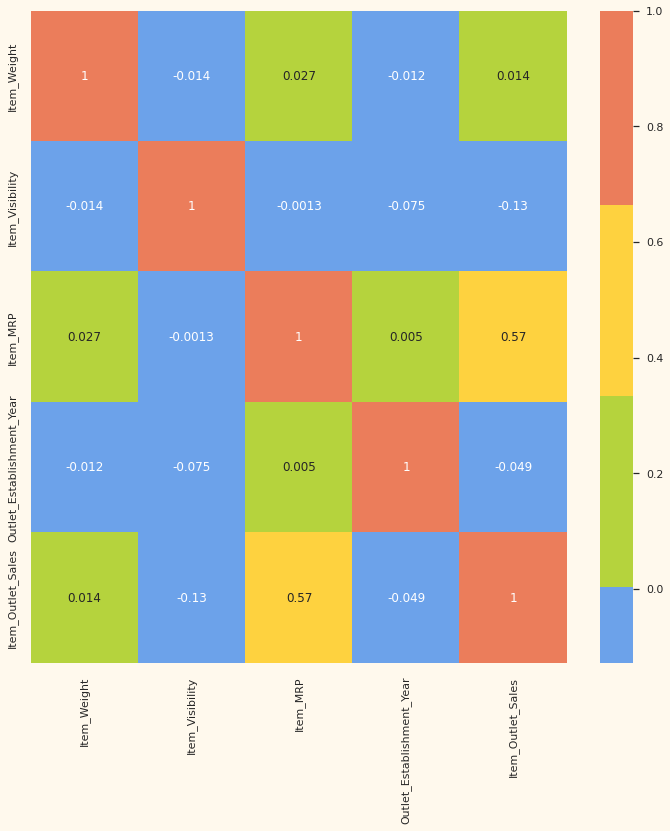

In [248]:
corrmat= df.corr()
plt.figure(figsize=(12,12))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

For the integer values in the dataset, viewing various values such as mean, standard deviation etc. for every column

In [249]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Finding missing/Null values

In [250]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Figure size 720x432 with 0 Axes>

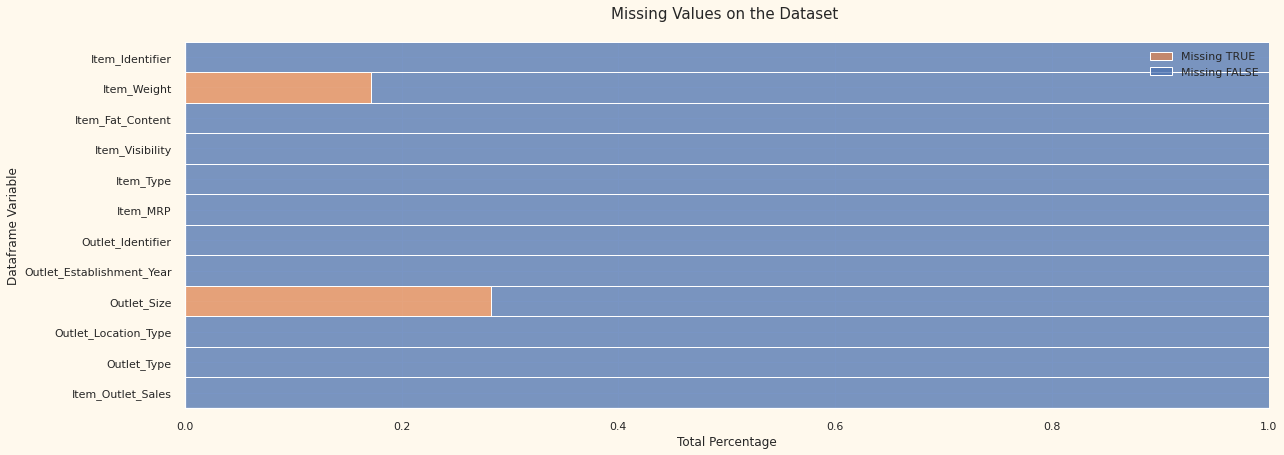

In [251]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    height=6,
    legend=False)

plt.title("Missing Values on the Dataset \n", size=15)
plt.xlabel("Total Percentage")
plt.ylabel("Dataframe Variable")
plt.legend(["Missing TRUE", "Missing FALSE"]);


DATA IMPUTATION


Replacing NaNs in the Item_weight column with the mean of values of the same column

In [252]:
mean_value=df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=mean_value, inplace=True)

In [253]:
df.groupby(['Outlet_Type','Outlet_Size']).size().reset_index().rename(columns={0:'count'})

,Outlet_Type,Outlet_Size,count
0,Grocery Store,Small,528
1,Supermarket Type1,High,932
2,Supermarket Type1,Medium,930
3,Supermarket Type1,Small,1860
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935


In [254]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Supermarket Type1'), 'Small', df['Outlet_Size'])

In [255]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Grocery Store'), 'Small', df['Outlet_Size'])

In [256]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Supermarket Type2'), 'Medium', df['Outlet_Size'])

In [257]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Supermarket Type3'), 'Medium', df['Outlet_Size'])

In [258]:
print("Missing values in data: \n")
df.isnull().sum()

Missing values in data: 



Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [259]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [260]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [261]:
mark_array=df.values

 K-MODES for clustering [ because data also has categorical features]

In [262]:
kproto = KPrototypes(n_clusters=4, verbose=1, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 288, ncost: 2597843332.1836615
Run: 1, iteration: 2/20, moves: 200, ncost: 2565192290.44933
Run: 1, iteration: 3/20, moves: 196, ncost: 2547385692.8089814
Run: 1, iteration: 4/20, moves: 164, ncost: 2536452086.983189
Run: 1, iteration: 5/20, moves: 149, ncost: 2529078081.9400907
Run: 1, iteration: 6/20, moves: 106, ncost: 2524672760.7208056
Run: 1, iteration: 7/20, moves: 88, ncost: 2522384134.3113437
Run: 1, iteration: 8/20, moves: 71, ncost: 2520325622.6665864
Run: 1, iteration: 9/20, moves: 66, ncost: 2518079623.4259553
Run: 1, iteration: 10/20, moves: 62, ncost: 2516434392.274955
Run: 1, iteration: 11/20, moves: 22, ncost: 2516169549.3837337
Run: 1, iteration: 12/20, moves: 14, ncost: 2516064169.942409
Run: 1, iteration: 13/20, moves: 19, ncost: 2515969681.5583043
Run: 1, iteration: 14/20, moves: 

In [263]:
print(kproto.cluster_centroids_)

[['12.861656550709363' '0.060276795981897155' '143.04324561911668'
  '2141.297170021722' 'FDD38' 'Low Fat' 'Snack Foods' 'OUT017' '2007'
  'Small' 'Tier 2' 'Supermarket Type1']
 ['12.964217750408148' '0.05810200273841058' '215.18324768211932'
  '6283.538206622536' 'FDA15' 'Low Fat' 'Fruits and Vegetables' 'OUT027'
  '1985' 'Small' 'Tier 3' 'Supermarket Type1']
 ['12.771496839862015' '0.074933380963123' '106.10677672140605'
  '700.7321532123314' 'FDW13' 'Low Fat' 'Fruits and Vegetables' 'OUT010'
  '1985' 'Small' 'Tier 3' 'Supermarket Type1']
 ['12.990249975636724' '0.060481254925266785' '182.87587947805474'
  '3825.245697627519' 'DRN47' 'Low Fat' 'Fruits and Vegetables' 'OUT027'
  '1985' 'Small' 'Tier 3' 'Supermarket Type1']]


In [264]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [265]:
df['cluster'] = list(clusters)

Visualizing the clusters by plotting Sales Value across Item types

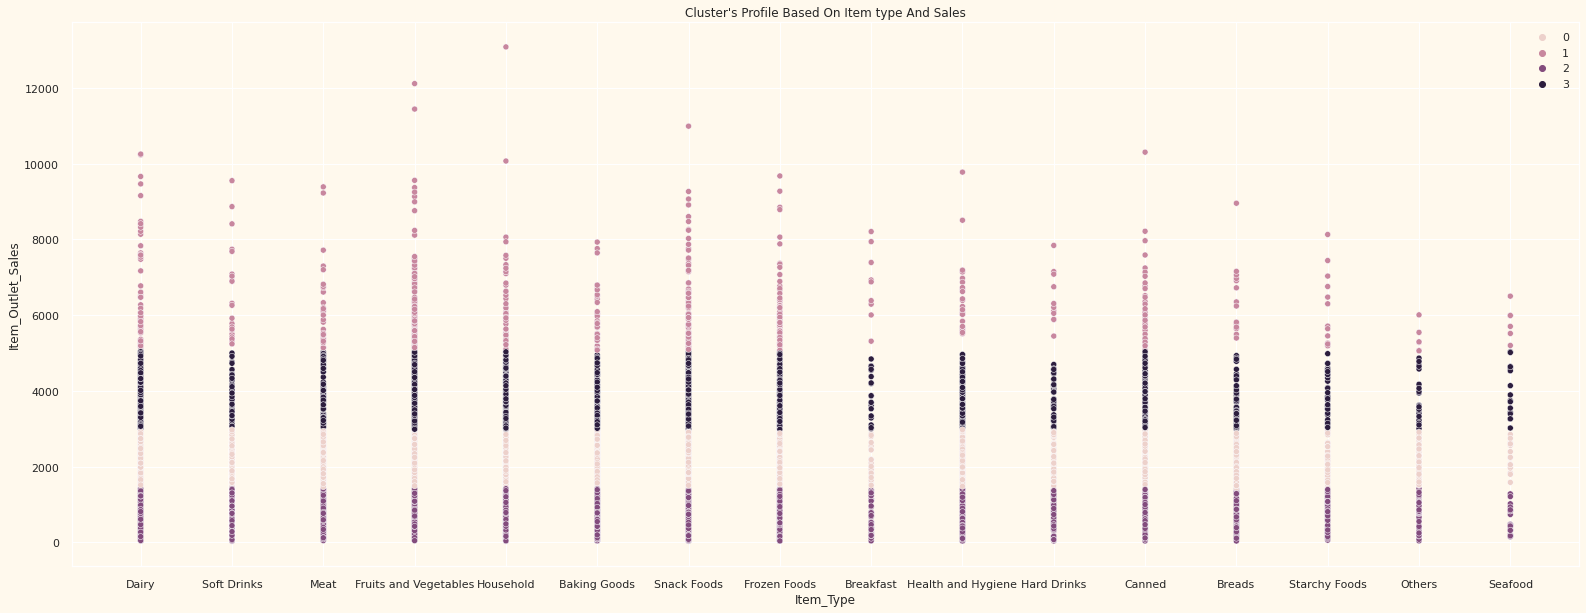

In [266]:
plt.subplots(figsize = (27,10))
pl = sns.scatterplot(data = df,x=df["Item_Type"], y=df["Item_Outlet_Sales"],hue=df["cluster"])
pl.set_title("Cluster's Profile Based On Item type And Sales")
plt.legend()
plt.show()

***Viewing of various clusters***

In [267]:
df[df['cluster']== 0].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,0
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Small,Tier 1,Supermarket Type1,1516.0266,0
11,FDA03,18.5,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,0
12,FDX32,15.1,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Small,Tier 1,Supermarket Type1,1589.2646,0
13,FDS46,17.6,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076,0


In [268]:
df[df['cluster']==1].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,1
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,Small,Tier 2,Supermarket Type1,5815.0972,1
55,FDK21,7.905,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.5200,1
74,NCZ18,7.825,Low Fat,0.186357,Household,254.3698,OUT049,1999,Small,Tier 1,Supermarket Type1,5580.7356,1
79,FDV25,5.905,Low Fat,0.000000,Canned,222.5456,OUT045,2002,Small,Tier 2,Supermarket Type1,5305.0944,1


In [269]:
df[df['cluster']==2].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,2
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,2
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Small,Tier 3,Supermarket Type1,343.5528,2


Visualizing clusters by plotting Sales value across outlet types.

So, it's clear that Supermarket type 3 has the most sales and grocery store has the least sales

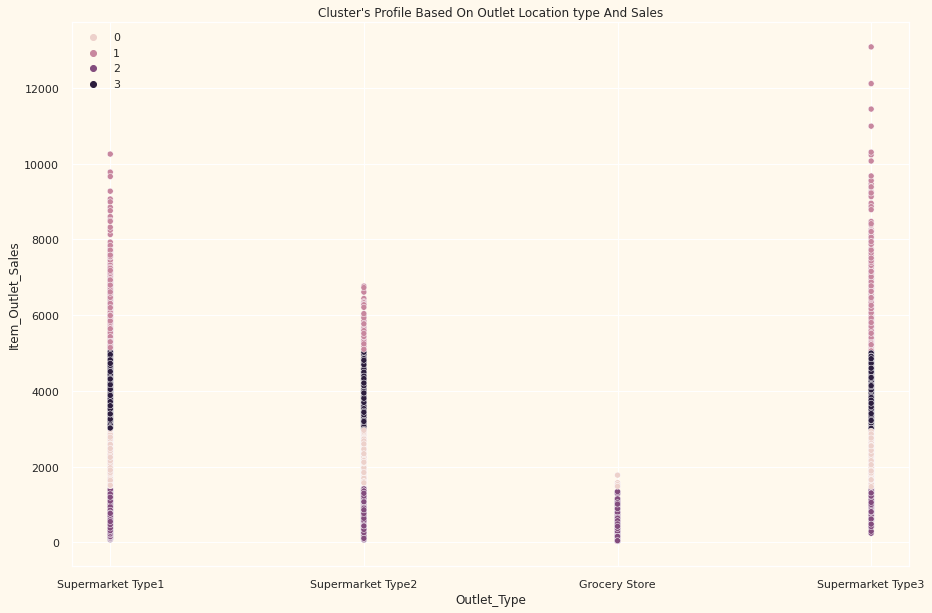

In [270]:
plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = df,x=df["Outlet_Type"], y=df["Item_Outlet_Sales"],hue=df["cluster"])
pl.set_title("Cluster's Profile Based On Outlet Location type And Sales")
plt.legend()
plt.show()

Let us check at which locations, the stores are making the most sales?

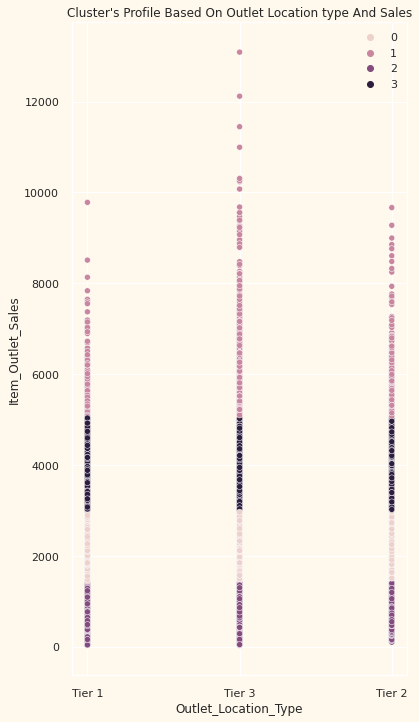

In [271]:
plt.subplots(figsize = (6,12))
pl = sns.scatterplot(data = df,x=df["Outlet_Location_Type"], y=df["Item_Outlet_Sales"],hue=df["cluster"])
pl.set_title("Cluster's Profile Based On Outlet Location type And Sales")
plt.legend()
plt.show()

So, the stores, locations and item_types in cluster 1 make the most sales

Encoding all the categorical values to numeric values

In [272]:
df['Item_Identifier'] = df['Item_Identifier'].astype('category')
df['Item_Identifier'] = df['Item_Identifier'].cat.codes

df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')
df['Item_Fat_Content'] = df['Item_Fat_Content'].cat.codes

df['Item_Type'] = df['Item_Type'].astype('category')
df['Item_Type'] = df['Item_Type'].cat.codes

df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('category')
df['Outlet_Identifier'] = df['Outlet_Identifier'].cat.codes

df['Outlet_Size'] = df['Outlet_Size'].astype('category')
df['Outlet_Size'] = df['Outlet_Size'].cat.codes

df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('category')
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].cat.codes

df['Outlet_Type'] = df['Outlet_Type'].astype('category')
df['Outlet_Type'] = df['Outlet_Type'].cat.codes

In [273]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,3
1,8,5.92,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,0
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,2
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052,2


Feature Engineering

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (8523, 13)
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##################################################################

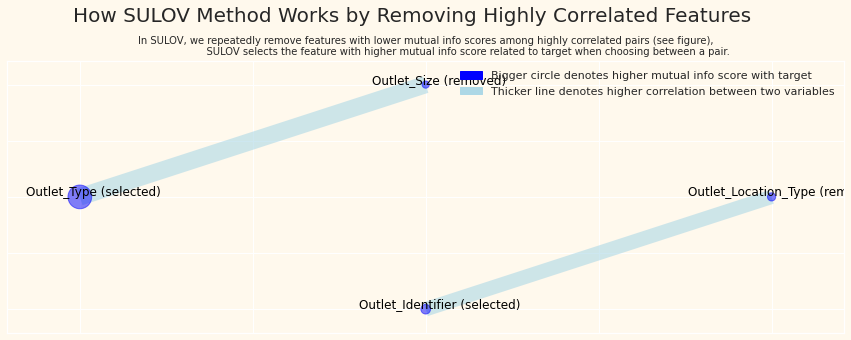

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 9
Final list of selected 9 vars after SULOV = ['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 'cluster', 'Outlet_Type', 'Outlet_Identifier']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 9 
    Taking top 2 features per iteration...
    XGBoost version using 1.7.4 as tree method: gpu_hist
Number of booster rounds = 100
        using 9 variables...
Regular XGBoost is crashing due to: [03:16:14] ../src/gbm/gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) 

In [274]:
target = 'Item_Outlet_Sales'
features = featurewiz(df, target, corr_limit=0.70,verbose=1)

In [275]:
#Create a copy of data
df_copy = df.copy()
# create a subset of dataframe
cols_del = ['Item_Fat_Content', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Size']
df_copy = df_copy.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_ds = pd.DataFrame(scaler.transform(df_copy),columns= df_copy.columns )
print("All the features are scaled")

All the features are scaled


In [276]:
cols_del = ['Item_Fat_Content', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type', 'cluster', 'Outlet_Establishment_Year']
df_num = df.copy()
df_num.drop(cols_del, axis=1, inplace = True)

In [277]:
cols_del = ['Outlet_Type', 'Item_Type']
df_num_scaled = scaled_ds.copy()
df_num_scaled.drop(cols_del, axis=1, inplace = True)

In [278]:
df_num.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


Elbow Method for determining the number of clusters to be formed:


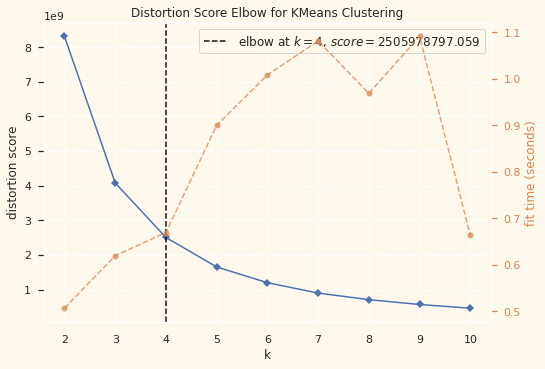

In [279]:
print('Elbow Method for determining the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_num)
Elbow_M.show()

K means clustering

In [280]:
kmeans = KMeans(n_clusters=4, max_iter=15).fit(df_num)
centers = kmeans.cluster_centers_
y_pred = kmeans.predict(df_num)

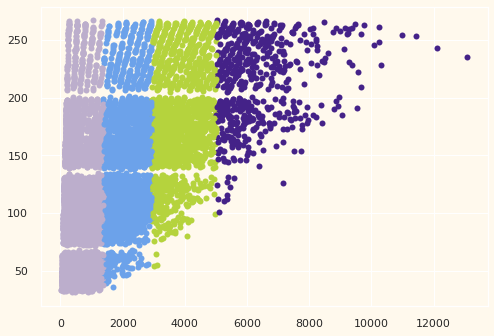

In [281]:
colors = ["#bcaecc", "#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]
center_colors = colors[:len(y_pred)]

for i, l in enumerate(kmeans.labels_):
    plt.plot(df_num['Item_Outlet_Sales'].values[i], df_num['Item_MRP'].values[i], color=colors[l], marker='o',ls='None')

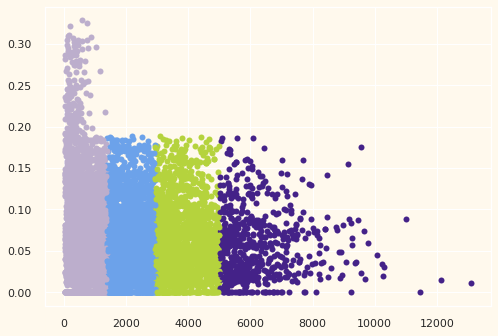

In [282]:
colors = ["#bcaecc", "#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]
center_colors = colors[:len(y_pred)]

for i, l in enumerate(kmeans.labels_):
    plt.plot(df_num['Item_Outlet_Sales'].values[i], df_num['Item_Visibility'].values[i], color=colors[l], marker='o',ls='None')

Agglomerative Clustering

In [283]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(df_num)
df_num["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

In [284]:
x = scaled_ds["Item_MRP"]
z = scaled_ds["Item_Weight"]
a = scaled_ds["Item_Visibility"]
t = scaled_ds['Item_Outlet_Sales']

Plotting the clusters

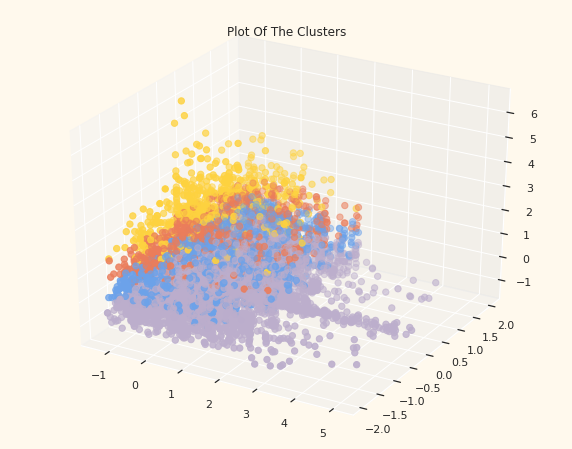

In [285]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(a, z, t, s=40, c=df_num["Clusters"], marker='o', cmap = cmap )
ax.set_title("Plot Of The Clusters")
plt.show()

Plotting the countplot of the clusters


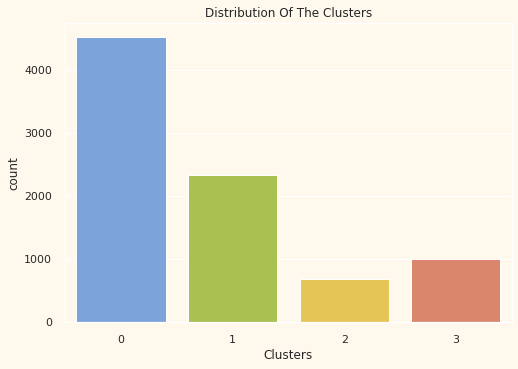

In [286]:
pal = ["#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B", "#bcaecc"]
pl = sns.countplot(x=df_num["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


The effect of item visibility on the sales value

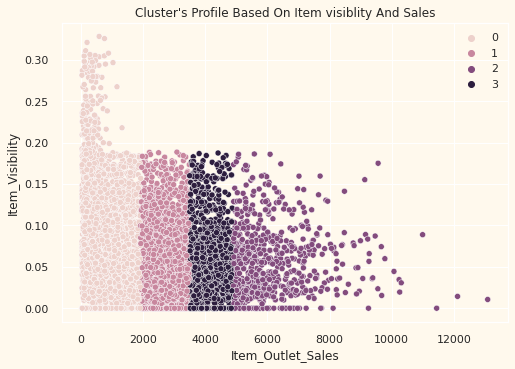

In [287]:
pl = sns.scatterplot(data = df_num,x=df_num["Item_Outlet_Sales"], y=df_num["Item_Visibility"],hue=df_num["Clusters"])
pl.set_title("Cluster's Profile Based On Item visiblity And Sales")
plt.legend()
plt.show()

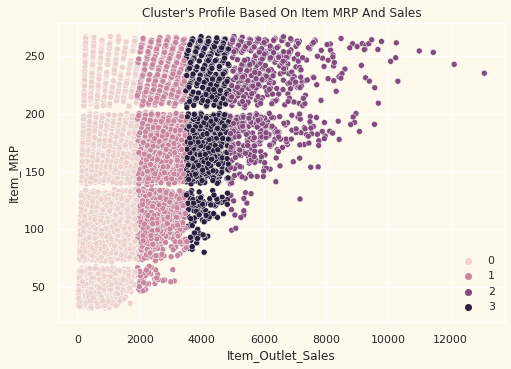

In [288]:
pl = sns.scatterplot(data = df_num,x=df_num["Item_Outlet_Sales"], y=df_num["Item_MRP"],hue=df_num["Clusters"])
pl.set_title("Cluster's Profile Based On Item MRP And Sales")
plt.legend()
plt.show()

In [289]:
from sklearn.cluster import AgglomerativeClustering

In [290]:
agglo_clustering = AgglomerativeClustering(n_clusters=5)
agglo_clustering.fit(scaled_ds)

AgglomerativeClustering(n_clusters=5)

In [291]:
clusters = agglo_clustering.fit_predict(scaled_ds)